## SIGNATE Biginners 03

In [2]:
import sys
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

%matplotlib inline

import check_miss_value as chv

In [29]:
train_pd = pd.read_csv('../000_data/train.csv')
test_pd = pd.read_csv('../000_data/test.csv')

In [19]:
train_pd.shape, test_pd.shape

((242150, 10), (26900, 9))

In [20]:
train_pd.describe()

,id,loan_amnt,interest_rate,credit_score
count,242150.00000,242150.000000,242150.000000,242150.000000
mean,121074.50000,1520.389009,13.801496,683.575024
std,69902.82818,830.250197,4.588924,29.554795
min,0.00000,323.797279,5.704849,655.424269
25%,60537.25000,761.954545,10.876086,659.531106
50%,121074.50000,1212.680586,13.543833,678.672563
75%,181611.75000,2152.213330,17.172395,698.591960
max,242149.00000,3851.867974,27.980604,808.551641


In [21]:
test_pd.describe()

,id,loan_amnt,interest_rate,credit_score
count,26900.000000,26900.000000,26900.000000,26900.000000
mean,255599.500000,1515.095458,13.778459,683.840319
std,7765.505457,827.710449,4.587711,29.685781
min,242150.000000,353.090088,5.745858,655.435675
25%,248874.750000,753.766957,10.846102,659.589762
50%,255599.500000,1213.754480,13.551492,678.707870
75%,262324.250000,2147.699462,17.128929,698.684676
max,269049.000000,3812.969623,27.503147,811.676356


In [22]:
train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242150 entries, 0 to 242149
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 242150 non-null  int64  
 1   loan_amnt          242150 non-null  float64
 2   term               242150 non-null  object 
 3   interest_rate      242150 non-null  float64
 4   grade              242150 non-null  object 
 5   employment_length  242150 non-null  object 
 6   purpose            242150 non-null  object 
 7   credit_score       242150 non-null  float64
 8   application_type   242150 non-null  object 
 9   loan_status        242150 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 18.5+ MB


In [23]:
test_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26900 entries, 0 to 26899
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 26900 non-null  int64  
 1   loan_amnt          26900 non-null  float64
 2   term               26900 non-null  object 
 3   interest_rate      26900 non-null  float64
 4   grade              26900 non-null  object 
 5   employment_length  26900 non-null  object 
 6   purpose            26900 non-null  object 
 7   credit_score       26900 non-null  float64
 8   application_type   26900 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 1.8+ MB


In [24]:
train_pd.head()

,id,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type,loan_status
0,0,609.296068,3 years,8.421982,A5,0 years,debt_consolidation,714.061803,Individual,FullyPaid
1,1,1183.266999,5 years,10.286776,B1,10 years,credit_card,697.706701,Individual,ChargedOff
2,2,695.783256,3 years,14.723425,C2,1 year,debt_consolidation,656.419357,Individual,FullyPaid
3,3,738.392546,3 years,14.260708,C1,0 years,credit_card,657.906852,Individual,FullyPaid
4,4,1642.400654,5 years,25.217452,E5,10 years,debt_consolidation,662.972297,Individual,FullyPaid


In [25]:
test_pd.head()

,id,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type
0,242150,1161.830205,3 years,13.105362,C1,10 years,credit_card,682.016083,Individual
1,242151,2257.465815,5 years,14.196200,C5,10 years,debt_consolidation,668.240313,Individual
2,242152,2182.137002,3 years,8.307772,A5,10 years,credit_card,703.277694,Individual
3,242153,520.284912,3 years,6.956504,A2,7 years,debt_consolidation,731.138779,Individual
4,242154,2303.349549,3 years,11.658497,B3,6 years,debt_consolidation,698.368991,Individual


In [30]:
train_pd['loan_status'][train_pd['loan_status'] == 'FullyPaid'] = 0
train_pd['loan_status'][train_pd['loan_status'] == 'ChargedOff'] = 1
train_pd['loan_status'] = train_pd['loan_status'].astype('int8')

C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242150 entries, 0 to 242149
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 242150 non-null  int64  
 1   loan_amnt          242150 non-null  float64
 2   term               242150 non-null  object 
 3   interest_rate      242150 non-null  float64
 4   grade              242150 non-null  object 
 5   employment_length  242150 non-null  object 
 6   purpose            242150 non-null  object 
 7   credit_score       242150 non-null  float64
 8   application_type   242150 non-null  object 
 9   loan_status        242150 non-null  int8   
dtypes: float64(3), int64(1), int8(1), object(5)
memory usage: 16.9+ MB


In [33]:
train_pd.head()

,id,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type,loan_status
0,0,609.296068,3 years,8.421982,A5,0 years,debt_consolidation,714.061803,Individual,0
1,1,1183.266999,5 years,10.286776,B1,10 years,credit_card,697.706701,Individual,1
2,2,695.783256,3 years,14.723425,C2,1 year,debt_consolidation,656.419357,Individual,0
3,3,738.392546,3 years,14.260708,C1,0 years,credit_card,657.906852,Individual,0
4,4,1642.400654,5 years,25.217452,E5,10 years,debt_consolidation,662.972297,Individual,0


In [34]:
train_pd.corr()

,id,loan_amnt,interest_rate,credit_score,loan_status
id,1.000000,0.001381,-0.002235,0.001604,-0.004058
loan_amnt,0.001381,1.000000,0.210790,0.098274,0.085033
interest_rate,-0.002235,0.210790,1.000000,-0.443101,0.270212
credit_score,0.001604,0.098274,-0.443101,1.000000,-0.126770
loan_status,-0.004058,0.085033,0.270212,-0.126770,1.000000


In [ ]:
train_pd.corr()[train_pd.corr() > 0.3]

In [ ]:
train_pd.corr()[train_pd.corr() < -0.3]

In [ ]:
train_pd.corr()[['disease']]

In [35]:
train_pd.loan_status.value_counts()

0    199794
1     42356
Name: loan_status, dtype: int64

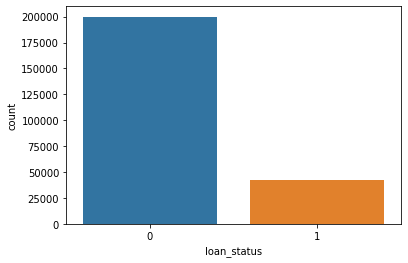

In [37]:
sns.countplot(x='loan_status', data=train_pd)

In [38]:
train_pd.grade.value_counts()

C4    18936
B4    18409
C1    16767
B2    16357
B3    16058
B1    15484
B5    15163
C2    13917
C5    11420
A5    10785
D1    10464
C3    10266
D4     9828
A4     9441
D2     8823
D3     8387
D5     6866
A3     6532
A1     5764
A2     5749
E2     2835
E4     2301
E1      640
E5      535
E3      416
F5        4
F3        3
Name: grade, dtype: int64

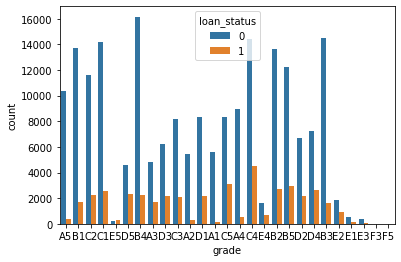

In [41]:
sns.countplot(x='grade', hue='loan_status', data=train_pd)

In [39]:
train_pd.purpose.value_counts()

debt_consolidation    160207
credit_card            48900
other                  17633
home_improvement        7686
car                     3855
medical                 3154
small_business           449
major_purchase           262
house                      4
Name: purpose, dtype: int64

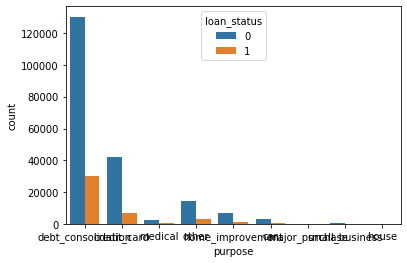

In [42]:
sns.countplot(x='purpose', hue='loan_status', data=train_pd)

In [40]:
train_pd.application_type.value_counts()

Individual    240368
Joint App       1782
Name: application_type, dtype: int64

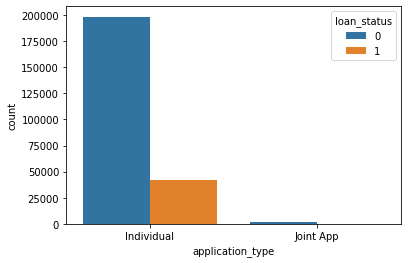

In [46]:
sns.countplot(x='application_type', hue='loan_status', data=train_pd)

In [47]:
train_pd.groupby(['loan_status', 'grade'])['grade'].count()

loan_status  grade
0            A1        5624
             A2        5430
             A3        4821
             A4        8921
             A5       10387
             B1       13747
             B2       13669
             B3       14469
             B4       16154
             B5       12213
             C1       14174
             C2       11643
             C3        8202
             C4       14448
             C5        8296
             D1        8329
             D2        6674
             D3        6186
             D4        7221
             D5        4573
             E1         495
             E2        1890
             E3         358
             E4        1622
             E5         247
             F3           1
1            A1         140
             A2         319
             A3        1711
             A4         520
             A5         398
             B1        1737
             B2        2688
             B3        1589
             B4        2255
 

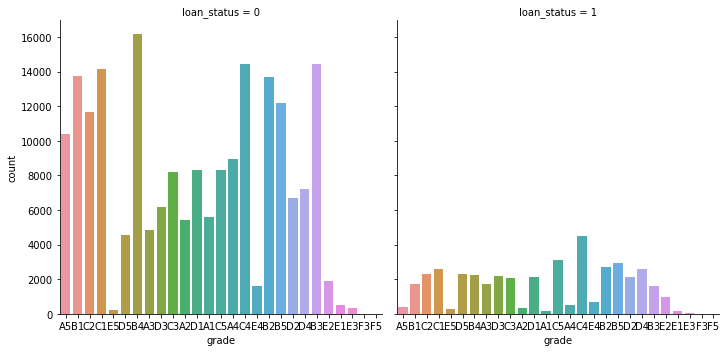

In [48]:
sns.catplot(x='grade', col='loan_status', data=train_pd, kind='count')

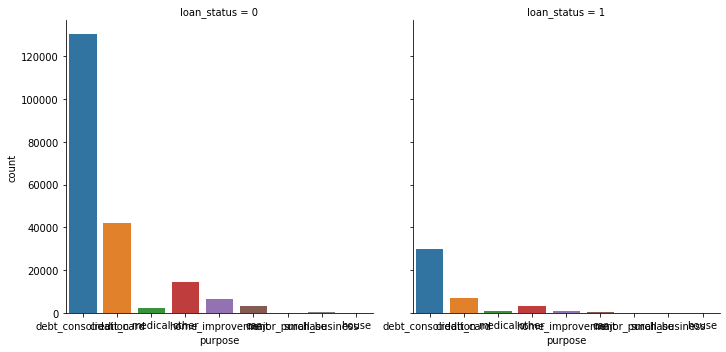

In [64]:
sns.catplot(x='purpose', col='loan_status', data=train_pd, kind='count')

In [ ]:
# 円グラフ
f, ax = plt.subplots(1, 2, figsize=(16, 8))
f.patch.set_facecolor('white')
train_pd['loan_status'][train_pd['Gender'] == 'Male'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
train_pd['loan_status'][train_pd['Gender'] == 'Female'].value_counts().plot.pie(explode=[0, 0.2], autopct='%1.1f%%', ax=ax[1], shadow=True)
# train_pd['disease'][train_pd['Gender'] == 'male'].value_counts().plot.pie(ax=ax[0], shadow=True)
# train_pd['disease'][train_pd['Gender'] == 'female'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1], shadow=True)
ax[0].set_title('loan_status(male)')
ax[1].set_title('loan_status(female)')

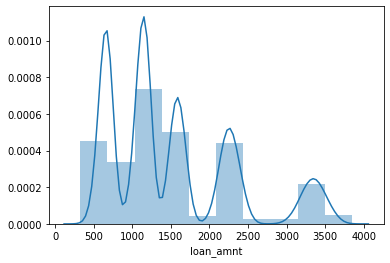

In [51]:
sns.distplot(train_pd.loan_amnt, bins=10, kde=True)

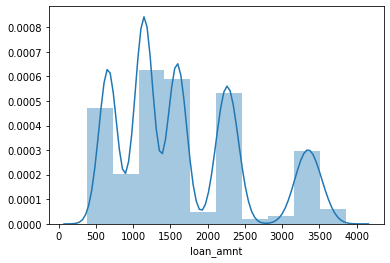

In [55]:
sns.distplot(train_pd.loan_amnt[train_pd['loan_status'] == 1], bins=10)

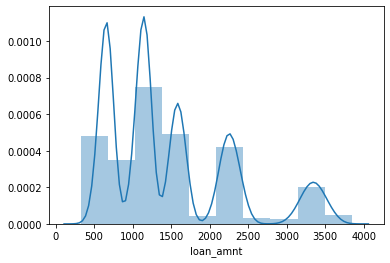

In [56]:
sns.distplot(train_pd.loan_amnt[train_pd['loan_status'] == 0], bins=10)

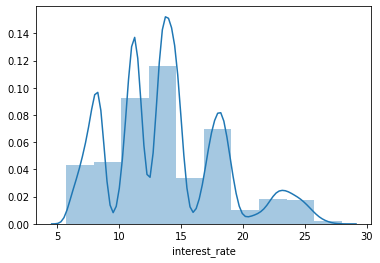

In [58]:
sns.distplot(train_pd.interest_rate, bins=10, kde=True)

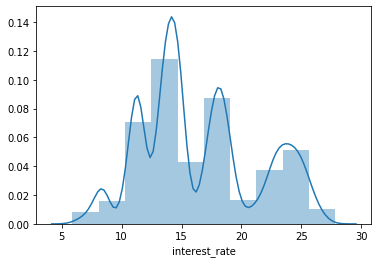

In [59]:
sns.distplot(train_pd.interest_rate[train_pd['loan_status'] == 1], bins=10)

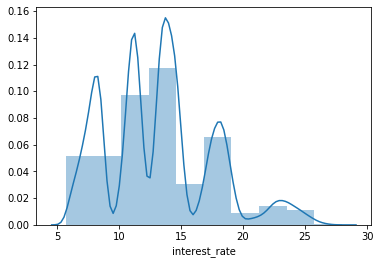

In [60]:
sns.distplot(train_pd.interest_rate[train_pd['loan_status'] == 0], bins=10)

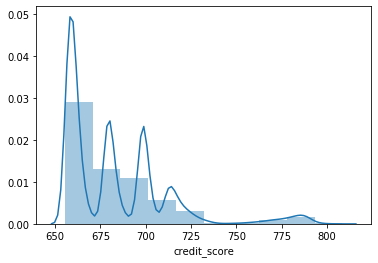

In [61]:
sns.distplot(train_pd.credit_score, bins=10, kde=True)

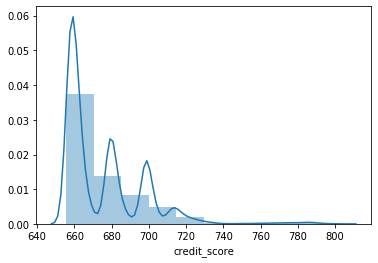

In [62]:
sns.distplot(train_pd.credit_score[train_pd['loan_status'] == 1], bins=10)

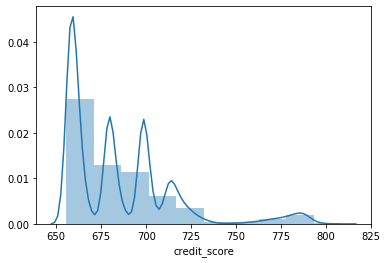

In [63]:
sns.distplot(train_pd.credit_score[train_pd['loan_status'] == 0], bins=10)

In [79]:
train_pd['term'] = train_pd['term'].str.replace(" years", "")
train_pd['term'] = train_pd['term'].str.replace(" year", "")
train_pd.head()

,id,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type,loan_status
0,0,609.296068,3,8.421982,A5,0 years,debt_consolidation,714.061803,Individual,0
1,1,1183.266999,5,10.286776,B1,10 years,credit_card,697.706701,Individual,1
2,2,695.783256,3,14.723425,C2,1 year,debt_consolidation,656.419357,Individual,0
3,3,738.392546,3,14.260708,C1,0 years,credit_card,657.906852,Individual,0
4,4,1642.400654,5,25.217452,E5,10 years,debt_consolidation,662.972297,Individual,0


In [86]:
train_pd.term.value_counts()

3    189887
5     52263
Name: term, dtype: int64

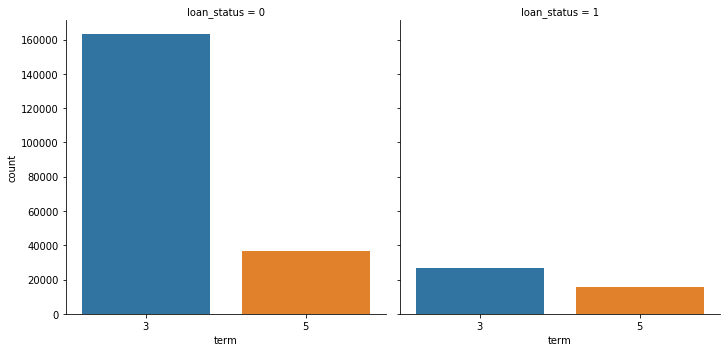

In [85]:
sns.catplot(x='term', col='loan_status', data=train_pd, kind='count')

In [80]:
train_pd['term'] = train_pd['term'].astype("int16")

In [82]:
train_pd['employment_length'] = train_pd['employment_length'].str.replace(" years", "")
train_pd['employment_length'] = train_pd['employment_length'].str.replace(" year", "")
train_pd.head()

,id,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type,loan_status
0,0,609.296068,3,8.421982,A5,0,debt_consolidation,714.061803,Individual,0
1,1,1183.266999,5,10.286776,B1,10,credit_card,697.706701,Individual,1
2,2,695.783256,3,14.723425,C2,1,debt_consolidation,656.419357,Individual,0
3,3,738.392546,3,14.260708,C1,0,credit_card,657.906852,Individual,0
4,4,1642.400654,5,25.217452,E5,10,debt_consolidation,662.972297,Individual,0


In [83]:
train_pd['employment_length'] = train_pd['employment_length'].astype("int16")

In [87]:
train_pd.employment_length.value_counts()

10    103339
0      19373
9      18374
2      15783
1      15141
6      14815
4      13418
5      12812
7      12673
3      11295
8       5127
Name: employment_length, dtype: int64

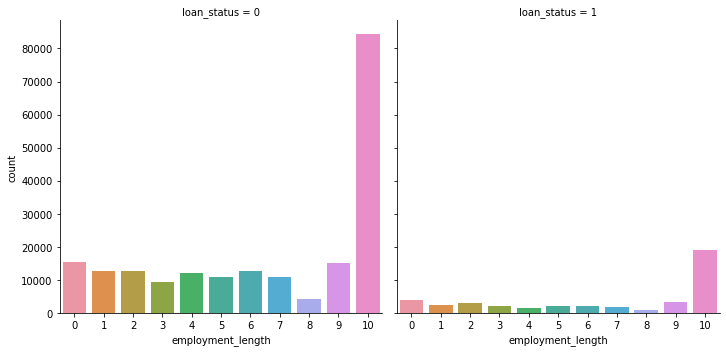

In [88]:
sns.catplot(x='employment_length', col='loan_status', data=train_pd, kind='count')

In [89]:
train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242150 entries, 0 to 242149
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 242150 non-null  int64  
 1   loan_amnt          242150 non-null  float64
 2   term               242150 non-null  int16  
 3   interest_rate      242150 non-null  float64
 4   grade              242150 non-null  object 
 5   employment_length  242150 non-null  int16  
 6   purpose            242150 non-null  object 
 7   credit_score       242150 non-null  float64
 8   application_type   242150 non-null  object 
 9   loan_status        242150 non-null  int8   
dtypes: float64(3), int16(2), int64(1), int8(1), object(3)
memory usage: 14.1+ MB


In [94]:
train_pd.columns[[1, 2, 3, 5, 7, 9]]

Index(['loan_amnt', 'term', 'interest_rate', 'employment_length',
       'credit_score', 'application_type', 'loan_status'],
      dtype='object')

C:\Users\owner\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\owner\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


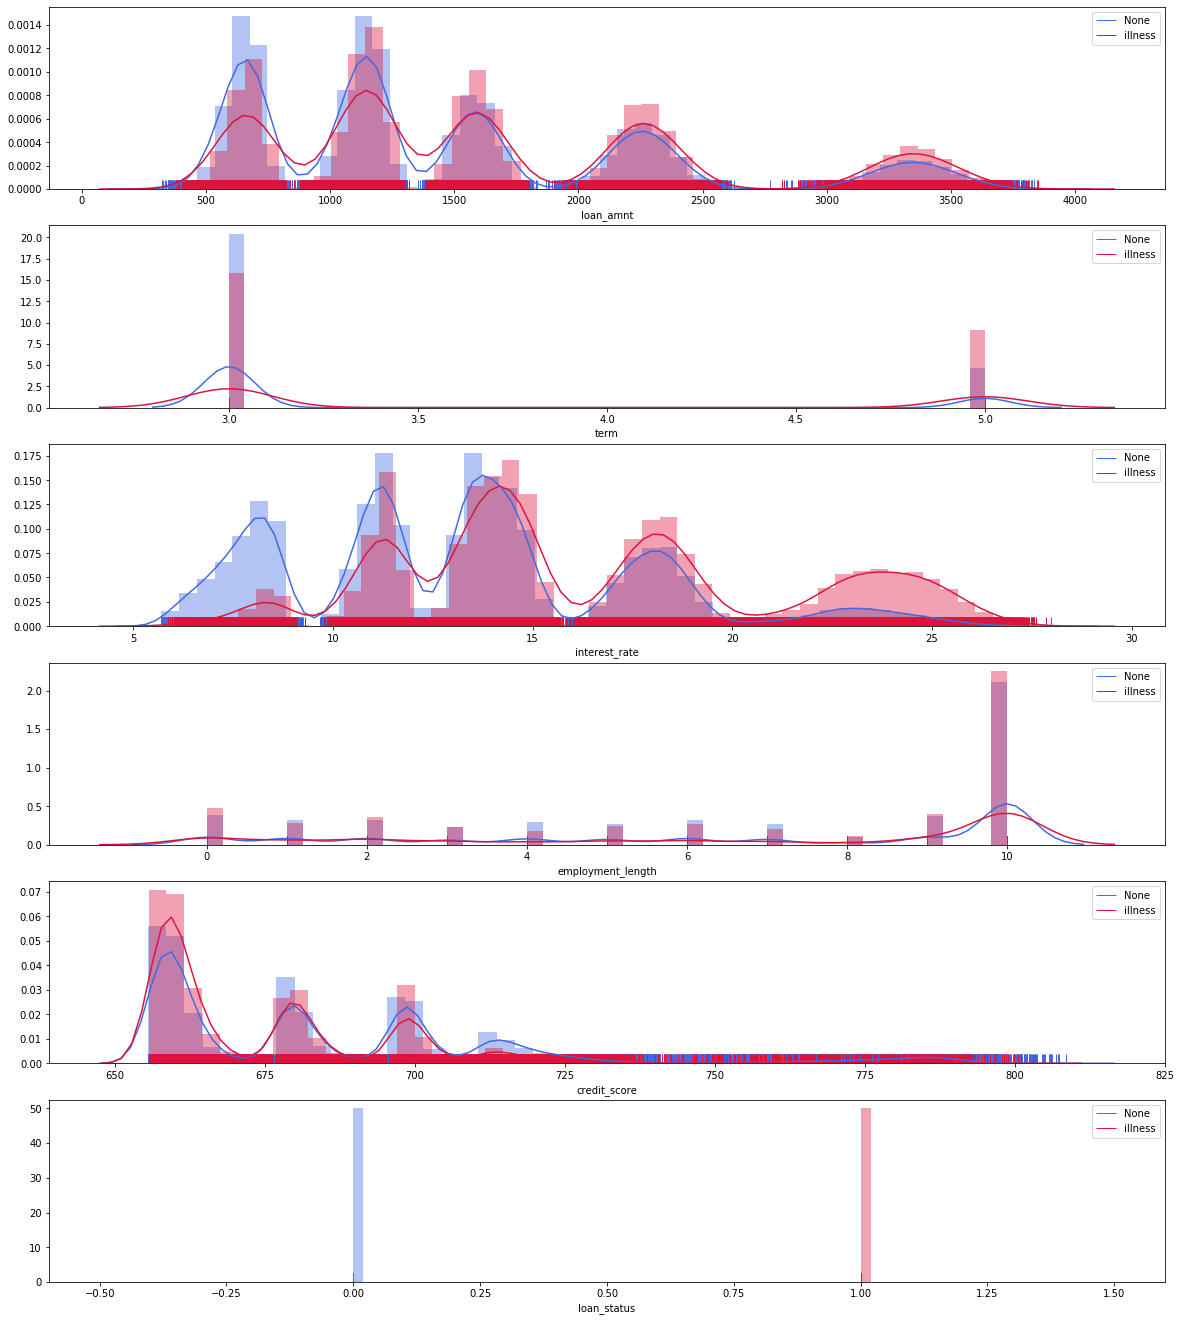

In [96]:
# 特徴量ごとに目的変数の分布を可視化
tr_features = train_pd.columns[[1, 2, 3, 5, 7, 9]]

legend = ['None', 'illness']
plt.figure(figsize=(20, 32 * 4))
gs = gridspec.GridSpec(32, 1)
for i, col in enumerate(train_pd[tr_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(train_pd[col][train_pd.loan_status == 0], bins=50, color='royalblue', rug=True)
    sns.distplot(train_pd[col][train_pd.loan_status == 1], bins=50, color='crimson', rug=True)
    plt.legend(legend)

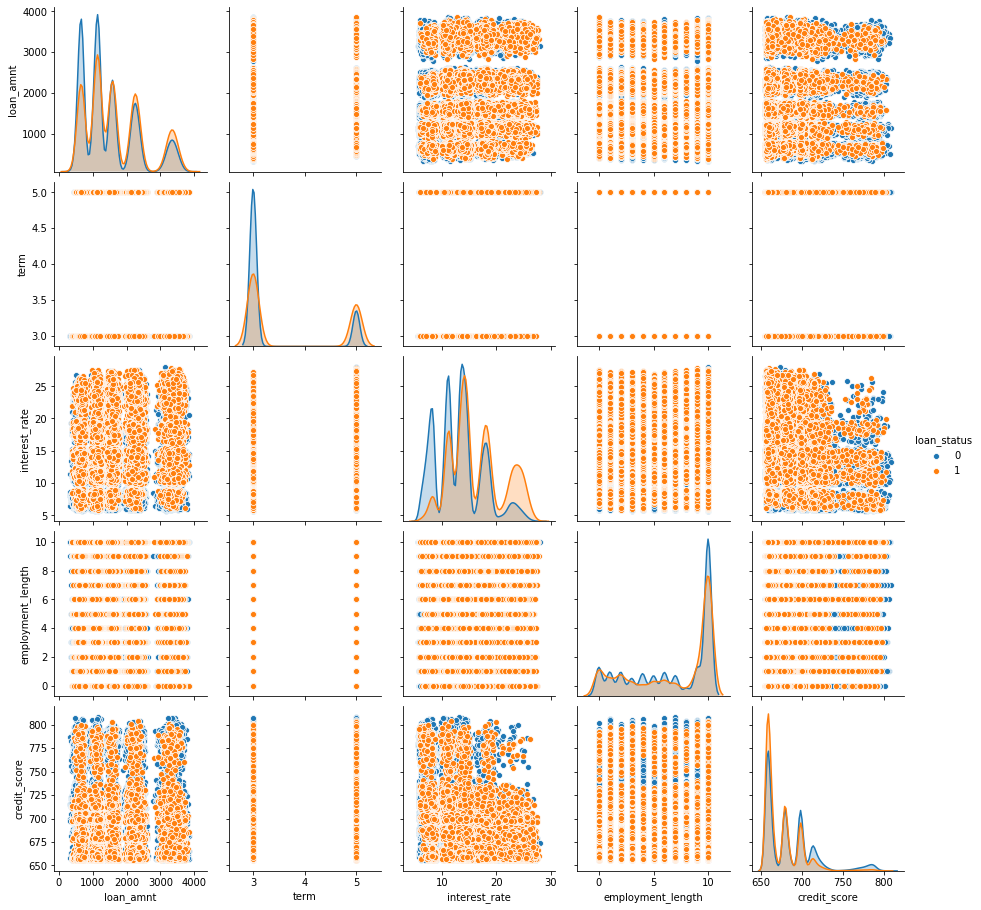

In [101]:
train_pd_copy = train_pd.copy().drop('id', axis=1)
sns.pairplot(train_pd_copy, hue='loan_status')

In [ ]:
# sns.pairplot(train_pd, hue='disease', hue_order=[0, 1]).savefig('seaborn_pairplot.png')

In [102]:
train_pd.corr()

,id,loan_amnt,term,interest_rate,employment_length,credit_score,loan_status
id,1.000000,0.001381,-0.002166,-0.002235,0.001016,0.001604,-0.004058
loan_amnt,0.001381,1.000000,0.345419,0.210790,0.066738,0.098274,0.085033
term,-0.002166,0.345419,1.000000,0.464065,0.029251,-0.029139,0.167006
interest_rate,-0.002235,0.210790,0.464065,1.000000,0.001107,-0.443101,0.270212
employment_length,0.001016,0.066738,0.029251,0.001107,1.000000,0.040481,0.008040
credit_score,0.001604,0.098274,-0.029139,-0.443101,0.040481,1.000000,-0.126770
loan_status,-0.004058,0.085033,0.167006,0.270212,0.008040,-0.126770,1.000000


In [104]:
train_pd.corr()[train_pd.corr() > 0.3]

,id,loan_amnt,term,interest_rate,employment_length,credit_score,loan_status
id,1.0,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,NaN,1.000000,0.345419,NaN,NaN,NaN,NaN
term,NaN,0.345419,1.000000,0.464065,NaN,NaN,NaN
interest_rate,NaN,NaN,0.464065,1.000000,NaN,NaN,NaN
employment_length,NaN,NaN,NaN,NaN,1.0,NaN,NaN
credit_score,NaN,NaN,NaN,NaN,NaN,1.0,NaN
loan_status,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [105]:
train_pd.corr()[train_pd.corr() < -0.3]

,id,loan_amnt,term,interest_rate,employment_length,credit_score,loan_status
id,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
term,NaN,NaN,NaN,NaN,NaN,NaN,NaN
interest_rate,NaN,NaN,NaN,NaN,NaN,-0.443101,NaN
employment_length,NaN,NaN,NaN,NaN,NaN,NaN,NaN
credit_score,NaN,NaN,NaN,-0.443101,NaN,NaN,NaN
loan_status,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
train_pd0 = train_pd[train_pd['loan_status'] == 0]
train_pd1 = train_pd[train_pd['loan_status'] == 1]


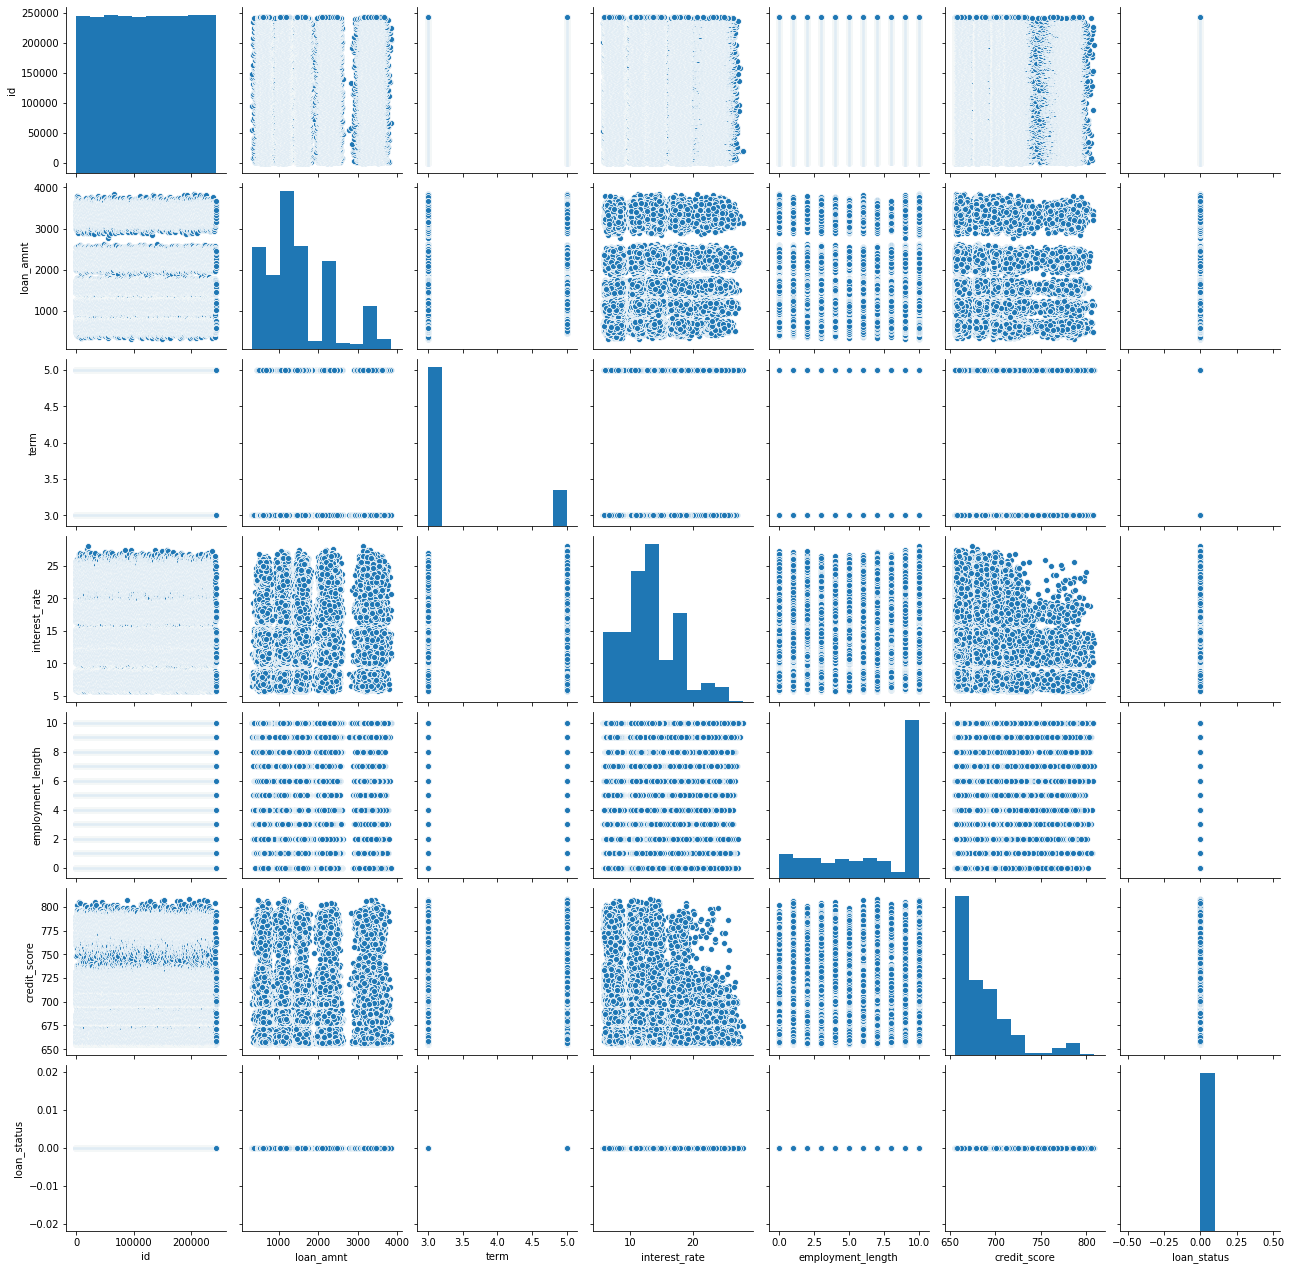

In [110]:
sns.pairplot(train_pd0)

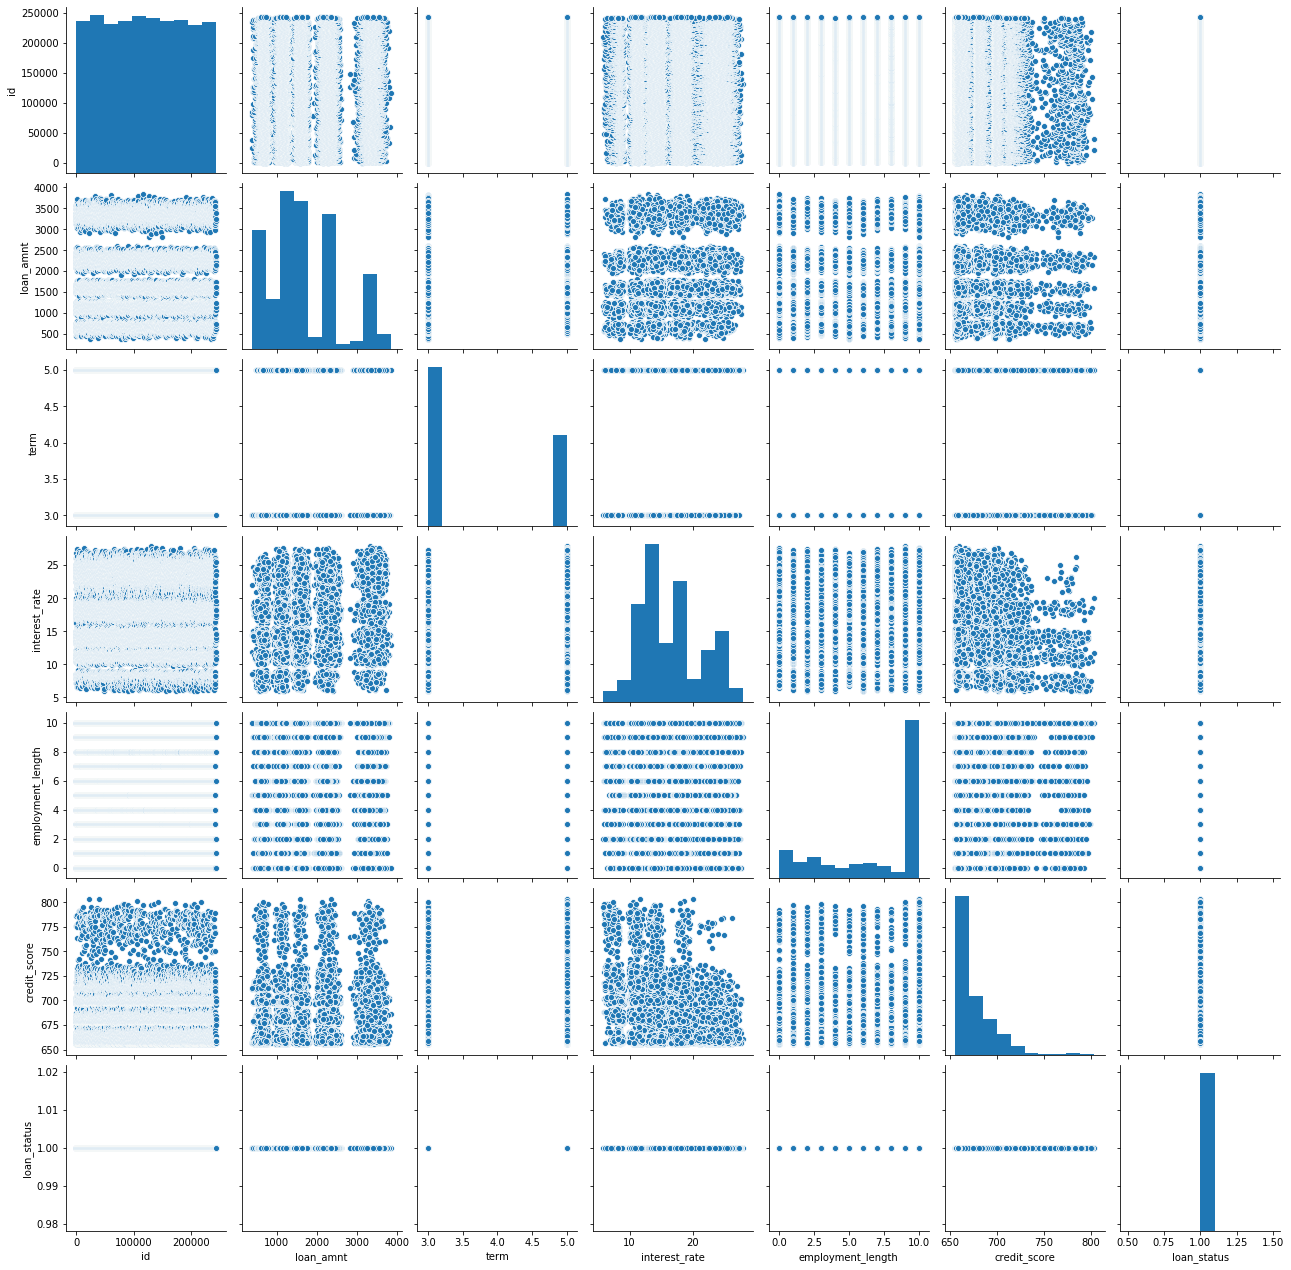

In [111]:
sns.pairplot(train_pd1)

In [112]:
train_pd['application_type'][train_pd['application_type'] == 'Joint App'] = 1
train_pd['application_type'][train_pd['application_type'] != 1] = 0


C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [114]:
train_pd['application_type'] = train_pd['application_type'].astype('int8')

In [115]:
train_pd.head()

,id,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type,loan_status
0,0,609.296068,3,8.421982,A5,0,debt_consolidation,714.061803,0,0
1,1,1183.266999,5,10.286776,B1,10,credit_card,697.706701,0,1
2,2,695.783256,3,14.723425,C2,1,debt_consolidation,656.419357,0,0
3,3,738.392546,3,14.260708,C1,0,credit_card,657.906852,0,0
4,4,1642.400654,5,25.217452,E5,10,debt_consolidation,662.972297,0,0


In [117]:
train_pd.application_type.sum()

1782

## Trainデータ編集

In [118]:
chv.check_miss_value(train_pd)

C:\Users\owner\codexa\600_SIGNATE\003_Biginner\001\check_miss_value.py:16: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  miss_table.coulmns = ['欠損数', '%']


,欠損数,%
id,0,0.0
loan_amnt,0,0.0
term,0,0.0
interest_rate,0,0.0
grade,0,0.0
employment_length,0,0.0
purpose,0,0.0
credit_score,0,0.0
application_type,0,0.0
loan_status,0,0.0


## Testデータ編集

In [120]:
test_cp = test_pd.copy()

In [121]:
test_cp['term'] = test_cp['term'].str.replace(" years", "")
test_cp['term'] = test_cp['term'].str.replace(" year", "")
test_cp['term'] = test_cp['term'].astype("int16")

In [122]:
test_cp['employment_length'] = test_cp['employment_length'].str.replace(" years", "")
test_cp['employment_length'] = test_cp['employment_length'].str.replace(" year", "")
test_cp['employment_length'] = test_cp['employment_length'].astype("int16")

In [123]:
test_cp['application_type'][test_cp['application_type'] == 'Joint App'] = 1
test_cp['application_type'][test_cp['application_type'] != 1] = 0
test_cp['application_type'] = test_cp['application_type'].astype('int8')

C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [124]:
test_cp.head()

,id,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type
0,242150,1161.830205,3,13.105362,C1,10,credit_card,682.016083,0
1,242151,2257.465815,5,14.196200,C5,10,debt_consolidation,668.240313,0
2,242152,2182.137002,3,8.307772,A5,10,credit_card,703.277694,0
3,242153,520.284912,3,6.956504,A2,7,debt_consolidation,731.138779,0
4,242154,2303.349549,3,11.658497,B3,6,debt_consolidation,698.368991,0


In [125]:
test_cp.shape, train_pd.shape

((26900, 9), (242150, 10))

In [126]:
train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242150 entries, 0 to 242149
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 242150 non-null  int64  
 1   loan_amnt          242150 non-null  float64
 2   term               242150 non-null  int16  
 3   interest_rate      242150 non-null  float64
 4   grade              242150 non-null  object 
 5   employment_length  242150 non-null  int16  
 6   purpose            242150 non-null  object 
 7   credit_score       242150 non-null  float64
 8   application_type   242150 non-null  int8   
 9   loan_status        242150 non-null  int8   
dtypes: float64(3), int16(2), int64(1), int8(2), object(2)
memory usage: 12.5+ MB


In [127]:
test_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26900 entries, 0 to 26899
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 26900 non-null  int64  
 1   loan_amnt          26900 non-null  float64
 2   term               26900 non-null  int16  
 3   interest_rate      26900 non-null  float64
 4   grade              26900 non-null  object 
 5   employment_length  26900 non-null  int16  
 6   purpose            26900 non-null  object 
 7   credit_score       26900 non-null  float64
 8   application_type   26900 non-null  int8   
dtypes: float64(3), int16(2), int64(1), int8(1), object(2)
memory usage: 1.4+ MB


## pickleファイルに保存

In [128]:
train_pd.to_pickle('train.pk1')
test_cp.to_pickle('test.pk1')

In [130]:
train_pd.shape, test_cp.shape

((242150, 10), (26900, 9))

In [ ]:
train_cp.info()

In [ ]:
test_cp.info()

In [ ]:
chv.check_miss_value(train_cp)

In [ ]:
chv.check_miss_value(test_cp)

In [ ]:
train_cp.head()

In [ ]:
test_cp.head()

In [ ]:
# train_cp.corr()['y']

In [ ]:
test_cp.corr()[test_cp.corr() > 0.3]

In [ ]:
test_cp.corr()[test_cp.corr() < -0.3]